In [4]:
import sbibm
import torch
import matplotlib.pyplot as plt

task = sbibm.get_task("two_moons")
prior = task.get_prior()
simulator = task.get_simulator()
observation = task.get_observation(num_observation=1)

In [2]:
log_prob_fn = task._likelihood

In [18]:
def generalized_likelihood(theta):
    resolution = 200
    x = simulator(theta.repeat((1000, 1)))
    distances = torch.exp(-1000.0*torch.mean((x - observation)**2, dim=1))
    integral = torch.mean(distances)
    return integral

In [19]:
theta_resolution = 50
theta1 = torch.linspace(-1, 1, theta_resolution)
theta2 = torch.linspace(-1, 1, theta_resolution)
x, y = torch.meshgrid(theta1, theta2)
thetas = torch.stack([x, y])
thetas = torch.reshape(thetas, (2, theta_resolution**2)).T

ls = []
for theta in thetas:
    ls.append(generalized_likelihood(theta))

In [20]:
ls = torch.stack(ls)
ls = torch.reshape(ls, (theta_resolution, theta_resolution))

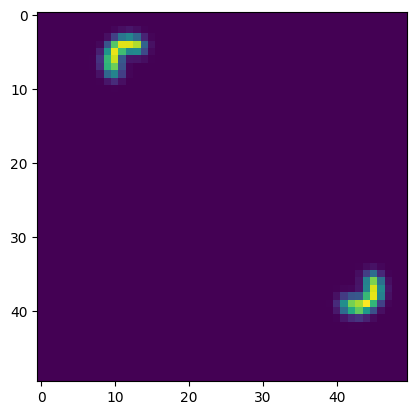

In [21]:
_ = plt.imshow(ls.numpy())